Pull data from file.

In [9]:
import pandas as pd

heart_data_2022_nan = pd.read_csv("./Archive/2022/heart_2022_with_nans.csv")

Pick data we cant to use.

In [10]:
df_model = heart_data_2022_nan[['HadHeartAttack', 'Sex', 'AgeCategory', 'BMI', 'SmokerStatus', 'SleepHours', 'AlcoholDrinkers', 'HadStroke']].dropna()

print(df_model.head())

  HadHeartAttack     Sex      AgeCategory    BMI   SmokerStatus  SleepHours  \
1             No  Female  Age 80 or older  26.57   Never smoked         6.0   
2             No  Female     Age 55 to 59  25.61   Never smoked         5.0   
4             No  Female     Age 40 to 44  21.77   Never smoked         9.0   
5            Yes    Male  Age 80 or older  26.08   Never smoked         7.0   
6             No  Female  Age 80 or older  22.96  Former smoker         7.0   

  AlcoholDrinkers HadStroke  
1              No        No  
2              No        No  
4             Yes        No  
5              No       Yes  
6             Yes        No  


Now One-hot Encode

In [11]:
df_encoded = pd.get_dummies(df_model, drop_first=True)

print(df_encoded.head())

     BMI  SleepHours  HadHeartAttack_Yes  Sex_Male  AgeCategory_Age 25 to 29  \
1  26.57         6.0               False     False                     False   
2  25.61         5.0               False     False                     False   
4  21.77         9.0               False     False                     False   
5  26.08         7.0                True      True                     False   
6  22.96         7.0               False     False                     False   

   AgeCategory_Age 30 to 34  AgeCategory_Age 35 to 39  \
1                     False                     False   
2                     False                     False   
4                     False                     False   
5                     False                     False   
6                     False                     False   

   AgeCategory_Age 40 to 44  AgeCategory_Age 45 to 49  \
1                     False                     False   
2                     False                     False   
4    

Now Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_values, columns=df_encoded.columns)
print(df_scaled.head())

        BMI  SleepHours  HadHeartAttack_Yes  Sex_Male  \
0  0.166058    0.217391                 0.0       0.0   
1  0.155102    0.173913                 0.0       0.0   
2  0.111276    0.347826                 0.0       0.0   
3  0.160466    0.260870                 1.0       1.0   
4  0.124857    0.260870                 0.0       0.0   

   AgeCategory_Age 25 to 29  AgeCategory_Age 30 to 34  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   AgeCategory_Age 35 to 39  AgeCategory_Age 40 to 44  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       0.0                       0.0   
4                       0.0  

Throw data at Model

Start with Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

X = df_scaled[['BMI', 'SleepHours', 'Sex_Male', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 30 to 34', \
    'AgeCategory_Age 35 to 39',  'AgeCategory_Age 40 to 44', 'AgeCategory_Age 45 to 49', 'AgeCategory_Age 50 to 54', \
    'AlcoholDrinkers_Yes', 'HadStroke_Yes']]
y = df_scaled['HadHeartAttack_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_regression = linear_reg.predict(X_test)

# Evaluate the model
mse_linear_regression = mean_squared_error(y_test, y_pred_regression)
print(f"Linear Regression Mean Squared Error: {mse_linear_regression}")

Linear Regression Mean Squared Error: 0.0523181972018557


Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
forest_reg = RandomForestRegressor(random_state=0, n_estimators=100)
forest_reg.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regression Mean Squared Error: {mse_forest}")

Random Forest Regression Mean Squared Error: 0.06071973415050133


In [35]:
print(y_train)

161038    0.0
49746     1.0
143492    1.0
84385     0.0
212834    0.0
         ... 
359783    0.0
358083    0.0
152315    0.0
117952    0.0
305711    0.0
Name: HadHeartAttack_Yes, Length: 287861, dtype: float64


Visual comparison

Logistic Regression Accuracy: 0.9415350945755823
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     54211
           1       0.25      0.00      0.00      3362

    accuracy                           0.94     57573
   macro avg       0.60      0.50      0.49     57573
weighted avg       0.90      0.94      0.91     57573



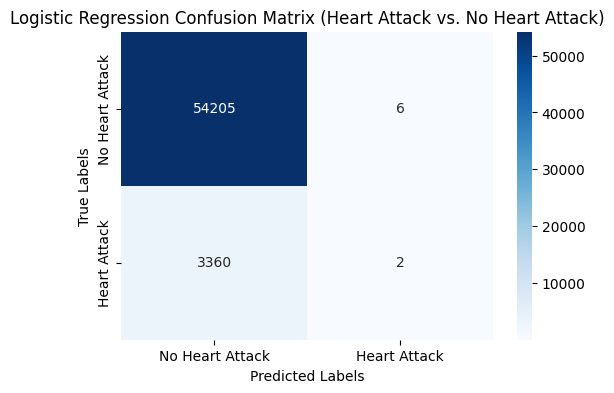

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_class_binary = y_train.astype(int)

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_train, y_class_binary, test_size=0.2, random_state=0)

# Initialize and train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_log = log_reg.predict(X_test_bin)

# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test_bin, y_pred_log))

# Evaluate the model with confusion matrix
conf_matrix_log = confusion_matrix(y_test_bin, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Attack", "Heart Attack"], yticklabels=["No Heart Attack", "Heart Attack"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix (Heart Attack vs. No Heart Attack)")
plt.show()


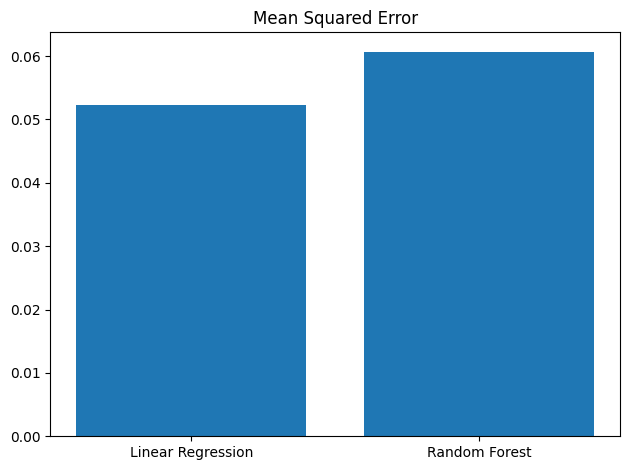

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and values
labels = ['Linear Regression', 'Random Forest']
values = [mse_linear_regression, mse_forest]

# Plot
plt.bar(labels, values)
plt.title('Mean Squared Error')
plt.tight_layout()
plt.show()
